In [1]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [12]:
df = pd.read_csv('creditcard.csv')


#**Explrative Data Analysis**

In [15]:
print(f" Shape: {df.shape}")
print(f" Info: {df.info()}")
print(f" Descriptive Statistics: {df.describe()}")

 Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

##Count plot - To demonstrate the distribution of fraud and non-fraud cases**

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


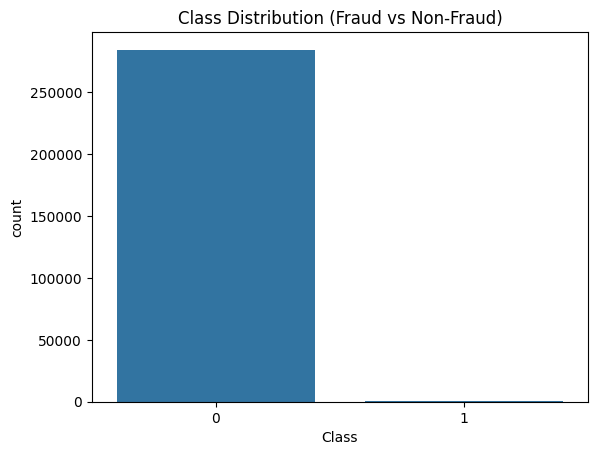

In [16]:
print(df['Class'].value_counts(normalize=True))

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

In [18]:
print(df.isnull().sum())
print(df.duplicated().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
1081


In [28]:
df1 = df.drop_duplicates()

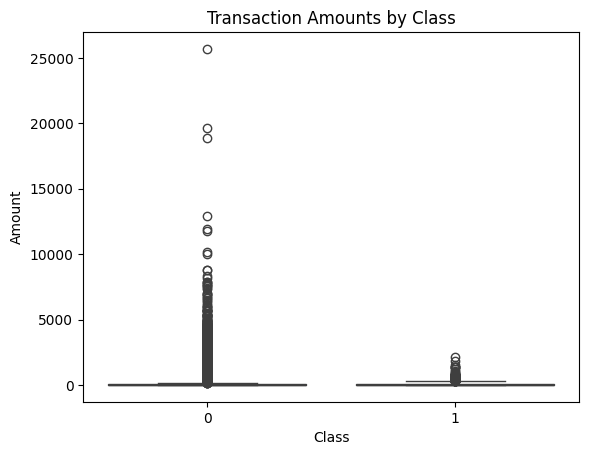

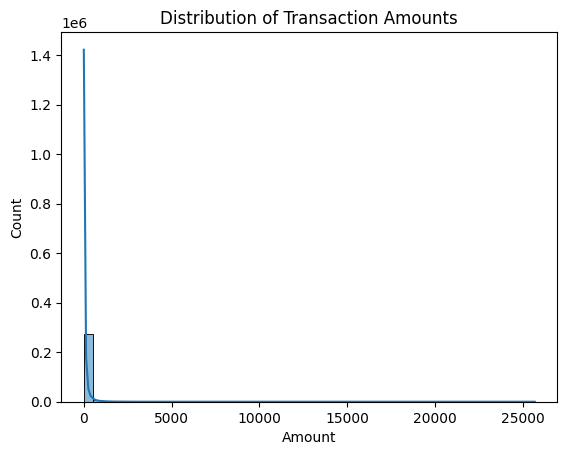

In [29]:
sns.boxplot(x='Class', y='Amount', data=df1)
plt.title("Transaction Amounts by Class")
plt.show()

sns.histplot(df1['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

##**Histogram - To determine time at which fraud cases mostly occured**

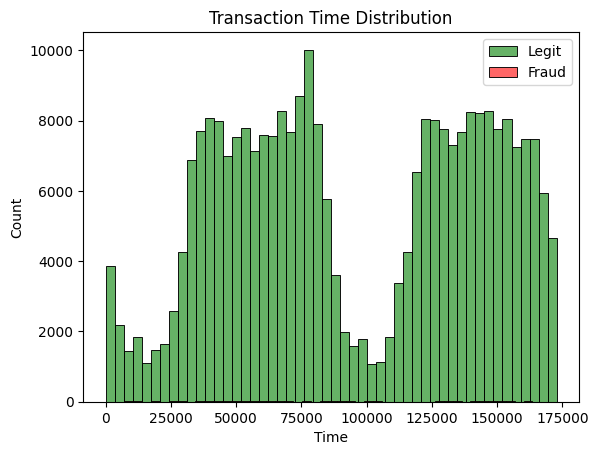

In [30]:
sns.histplot(df1[df1['Class']==0]['Time'], bins=50, color='green', label='Legit', alpha=0.6)
sns.histplot(df1[df1['Class']==1]['Time'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title("Transaction Time Distribution")
plt.show()

##**Correlation Heatmap - To determine the correlation among the features**

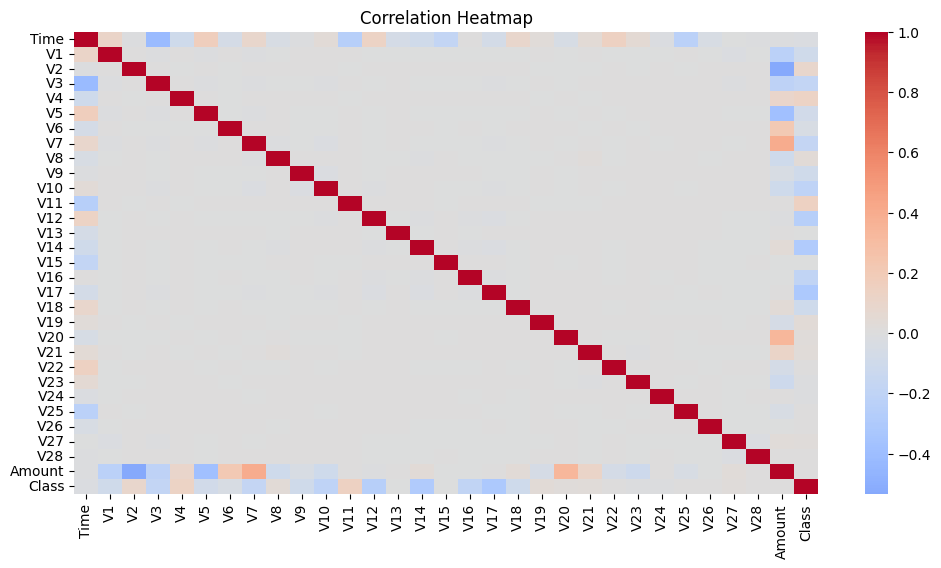

Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64


In [31]:
corr = df1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

print(corr['Class'].sort_values(ascending=False)[:10])

##**KDE PLOT - To determine fraud and legit cases among the features**

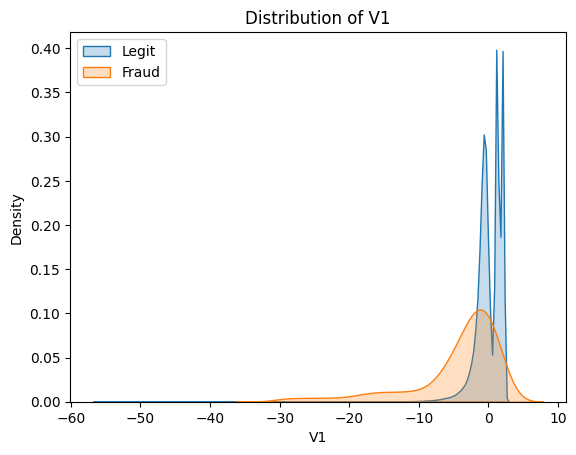

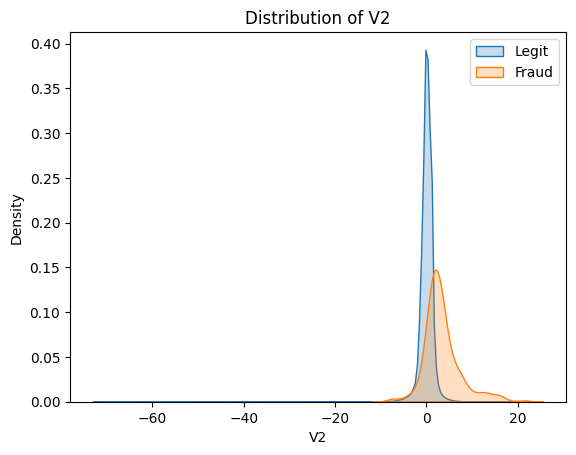

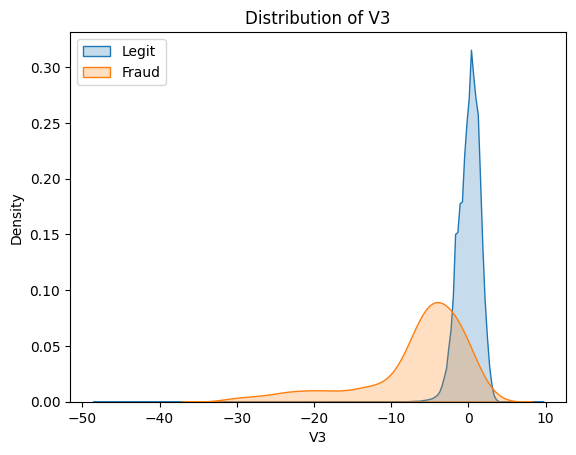

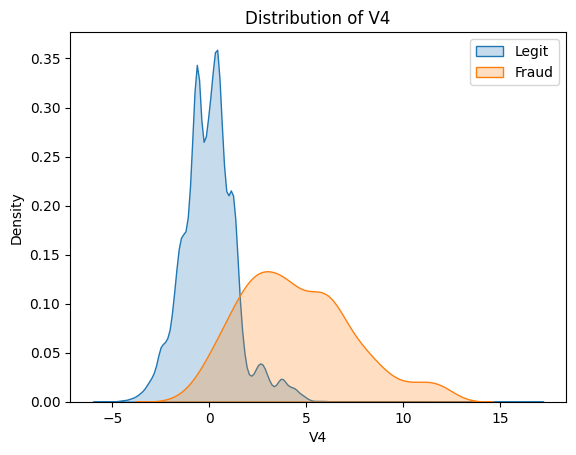

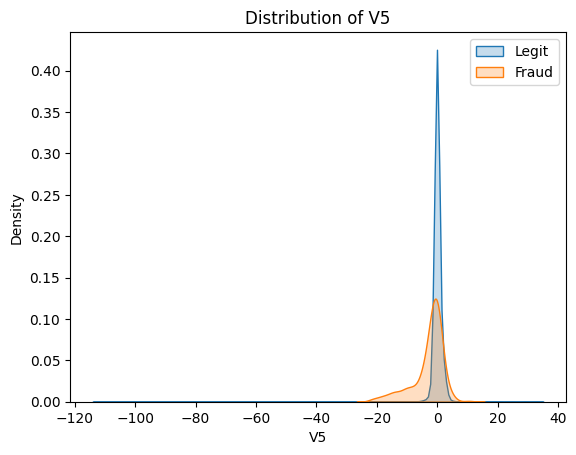

In [32]:
features = ['V1','V2','V3','V4','V5']

for col in features:
    sns.kdeplot(df1[df1['Class']==0][col], label='Legit', fill=True)
    sns.kdeplot(df1[df1['Class']==1][col], label='Fraud', fill=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

##**Boxplot - to determine utliers especially in Fraud cases**

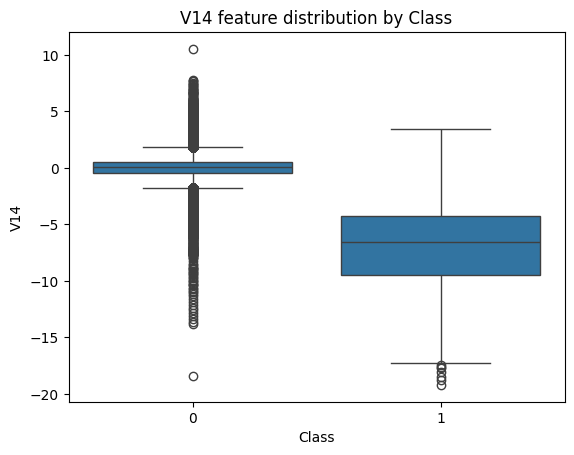

In [33]:
sns.boxplot(x='Class', y='V14', data=df1)
plt.title("V14 feature distribution by Class")
plt.show()

In [34]:
df1['Amount_Scaled'] = StandardScaler().fit_transform(df1[['Amount']])
df1['Time_Scaled'] = StandardScaler().fit_transform(df1[['Time']])

/tmp/ipython-input-102808963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Amount_Scaled'] = StandardScaler().fit_transform(df1[['Amount']])
/tmp/ipython-input-102808963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time_Scaled'] = StandardScaler().fit_transform(df1[['Time']])


##**Feature Engineering - Data Spilting**

In [38]:
X = df1.drop('Class', axis=1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Model Selection, Training and Fitting**

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**Metrics Evaluation - To evaluate the Model's Performance**

In [41]:
print(f"Roc auc score: {roc_auc_score(y_test, y_pred)}")
print(f"Classification report: {classification_report(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusin matrix: {confusion_matrix(y_test, y_pred)}")

Roc auc score: 0.8054584784586903
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.83      0.61      0.71        90

    accuracy                           1.00     56746
   macro avg       0.92      0.81      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 0.9991893701758714
Confusin matrix: [[56645    11]
 [   35    55]]


##**Features Importance and Visualization - To determine the features with powerful influence towards the model and each feature's influence**

In [44]:
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head())

          Feature  Importance
31    Time_Scaled    1.942522
30  Amount_Scaled    0.343705
1              V1    0.333071
4              V4    0.253843
5              V5    0.239162


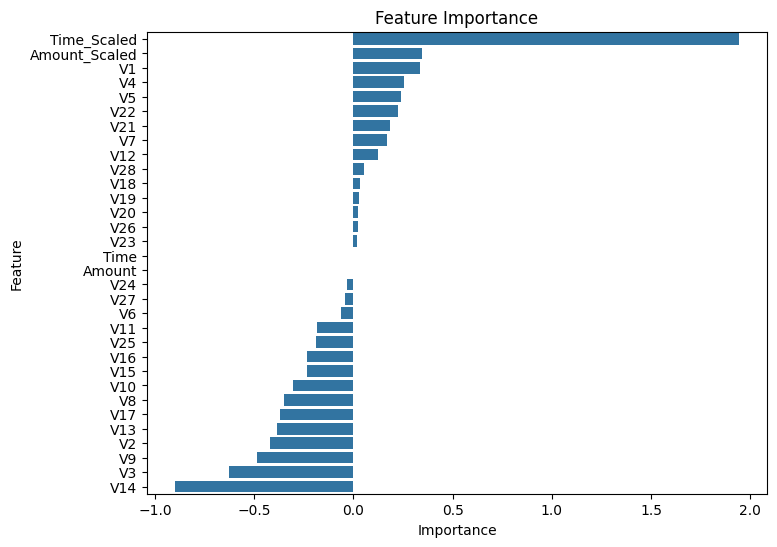

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

##**Calibration plot - To check if Probabilities match actual outcomes**

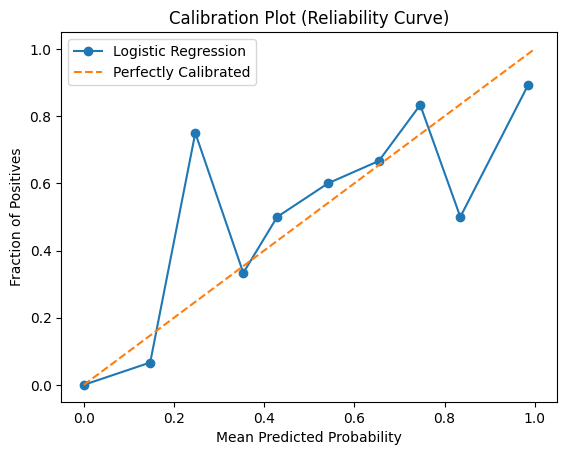

In [47]:
from sklearn.calibration import calibration_curve

y_proba = model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0,1],[0,1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plot (Reliability Curve)")
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_proba)
print("Brier Score:", brier)

Brier Score: 0.0007178385139918982


##**Visualizing the Confusion Matrix - To determine the model's predictions against Actual values**

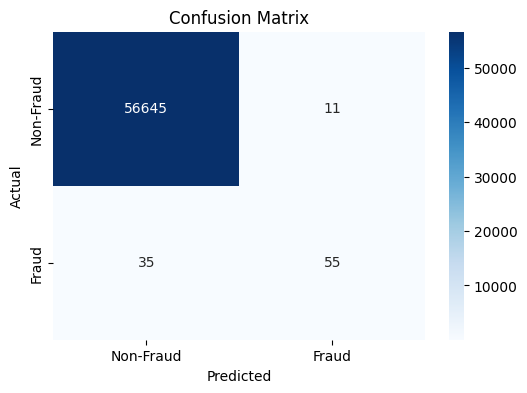

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud','Fraud'], yticklabels=['Non-Fraud','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##**Visualizing the Accuracy Score**

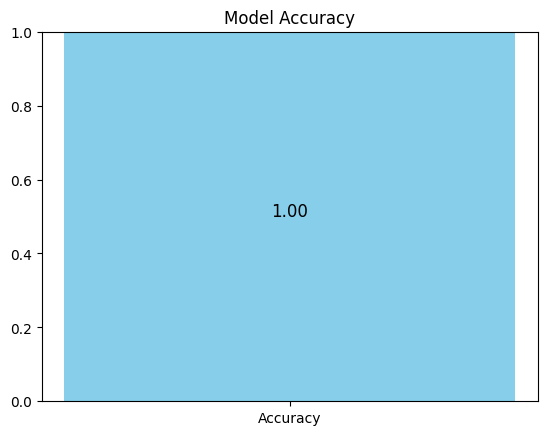

In [50]:
acc = accuracy_score(y_test, y_pred)

plt.bar(["Accuracy"], [acc], color="skyblue")
plt.ylim(0,1)  # accuracy is between 0 and 1
plt.title("Model Accuracy")
plt.text(0, acc/2, f"{acc:.2f}", ha='center', fontsize=12, color="black")
plt.show()